In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('../data/cleaned_telco_customer_churn.csv')
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

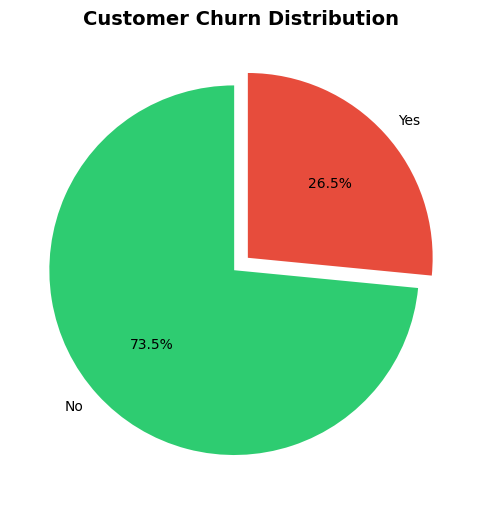

In [29]:
# Display churn distribution as a pie chart
churn_counts = df['churn'].value_counts()
churn_percentages = df['churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)

plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=colors, explode=explode, startangle=90)

plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

In [7]:
churned_df = df[df['churn'] == 'Yes']
lost_monthly_revenue = churned_df['monthly_charges'].sum()

print(f"Lost Potential Monthly Revenue: ${lost_monthly_revenue:.2f}")

Lost Potential Monthly Revenue: $139130.85


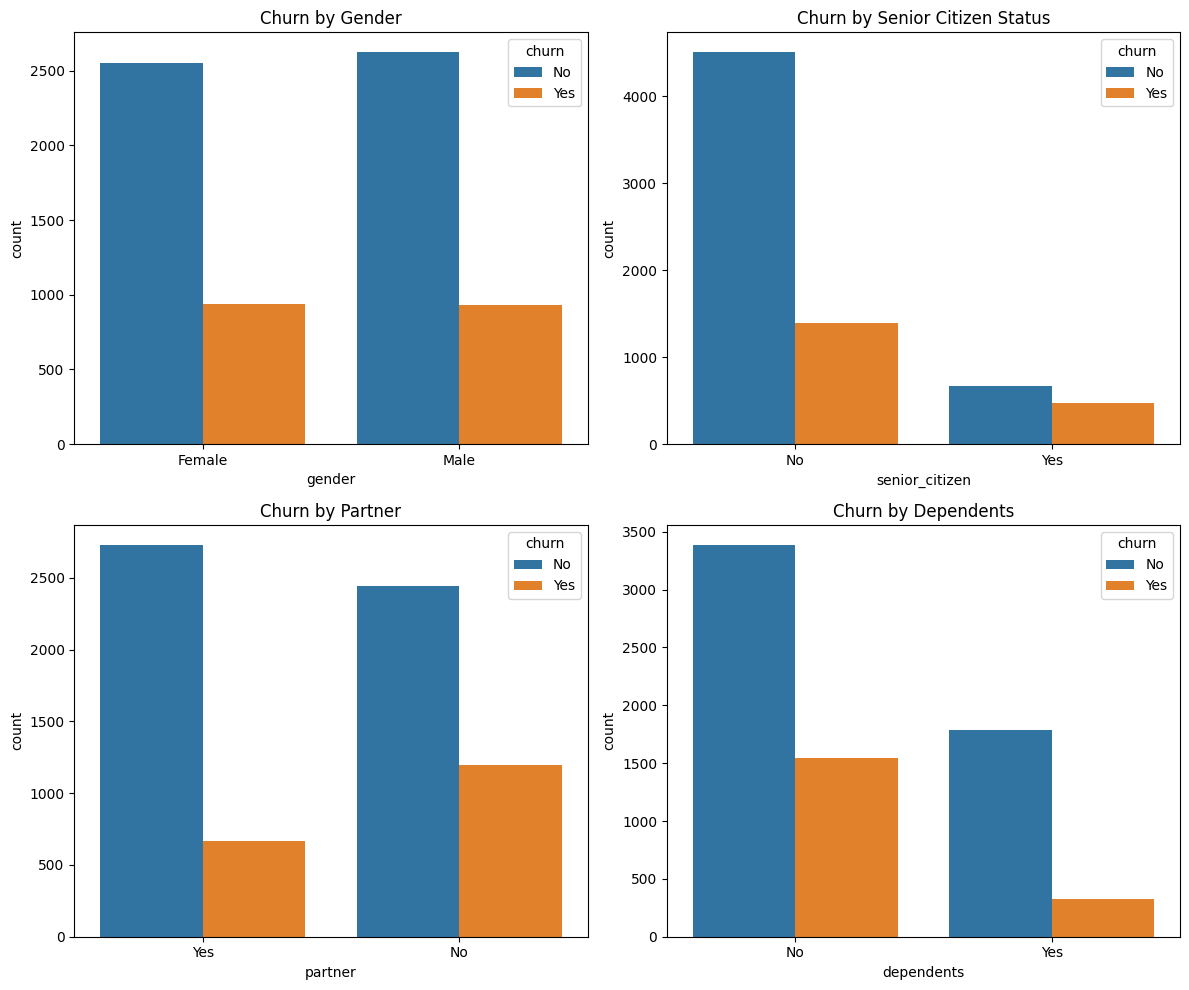

In [8]:
# Plotting each Demographic Services features with churn
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data=df, x='gender', hue='churn', ax=axes[0, 0])
axes[0, 0].set_title('Churn by Gender')

sns.countplot(data=df, x='senior_citizen', hue='churn', ax=axes[0, 1])
axes[0, 1].set_title('Churn by Senior Citizen Status')
axes[0, 1].set_xticks([0, 1], ['No', 'Yes'])

sns.countplot(data=df, x='partner', hue='churn', ax=axes[1, 0])
axes[1, 0].set_title('Churn by Partner')

sns.countplot(data=df, x='dependents', hue='churn', ax=axes[1, 1])
axes[1, 1].set_title('Churn by Dependents')

plt.tight_layout()
plt.show()

In [27]:
variables = ['senior_citizen', 'partner', 'dependents']

# find statistical significance (Chi-Square Test) and practical significance (Cramer's V) 
# for each Demographic features with churn
for var in variables:
    cont = pd.crosstab(df[var], df['churn'])
    chi2, p, _, _ = chi2_contingency(cont)
    
    # only count its practical significance if it is statistically significance
    if p <= 0.05:
        n = cont.sum().sum()
        r, k = cont.shape
        cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))
        print(f"There is a significant association between {var} and churn with an effect size (Cramer's V) of {cramer_v:.4f}")

There is a significant association between senior_citizen and churn with an effect size (Cramer's V) of 0.1505
There is a significant association between partner and churn with an effect size (Cramer's V) of 0.1501
There is a significant association between dependents and churn with an effect size (Cramer's V) of 0.1639


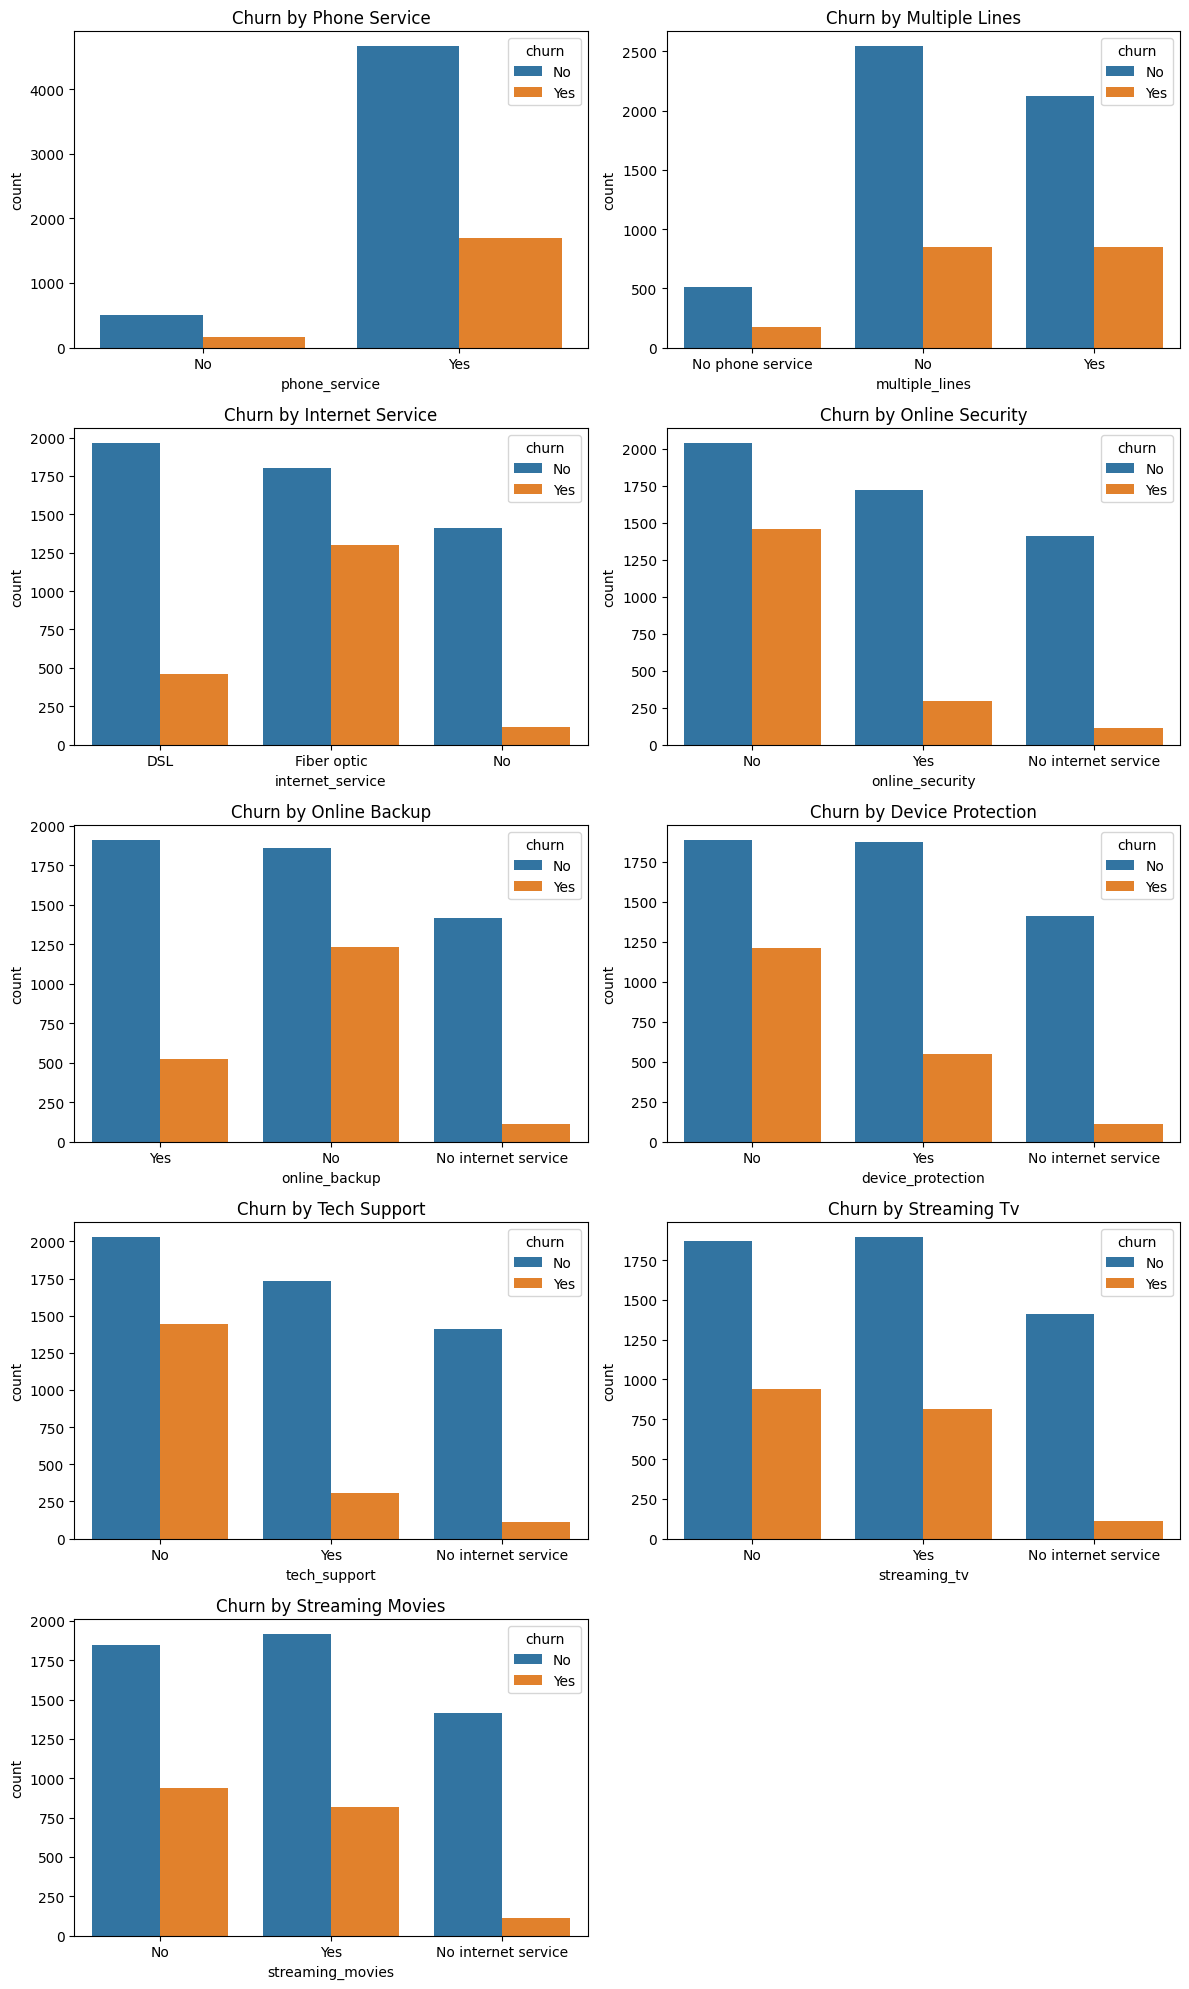

In [11]:
variables = ['phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# Plotting each Telecom Services features with churn
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=var, hue='churn', ax=axes[row, col])
    axes[row, col].set_title(f'Churn by {var.replace("_", " ").title()}')

axes[4, 1].set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
variables = ['phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

# find statistical significance (Chi-Square Test) and practical significance (Cramer's V) 
# for each Telecom Services features with churn
for var in variables:
    cont = pd.crosstab(df[var], df['churn'])
    chi2, p, _, _ = chi2_contingency(cont)
    
    # only count its practical significance if it is statistically significance
    if p <= 0.05:
        n = cont.sum().sum()
        r, k = cont.shape
        cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))
        print(f"There is a significant association between {var} and churn with an effect size (Cramer's V) of {cramer_v:.4f}")

There is a significant association between multiple_lines and churn with an effect size (Cramer's V) of 0.0401
There is a significant association between internet_service and churn with an effect size (Cramer's V) of 0.3225
There is a significant association between online_security and churn with an effect size (Cramer's V) of 0.3474
There is a significant association between online_backup and churn with an effect size (Cramer's V) of 0.2923
There is a significant association between device_protection and churn with an effect size (Cramer's V) of 0.2816
There is a significant association between tech_support and churn with an effect size (Cramer's V) of 0.3429
There is a significant association between streaming_tv and churn with an effect size (Cramer's V) of 0.2305
There is a significant association between streaming_movies and churn with an effect size (Cramer's V) of 0.2310


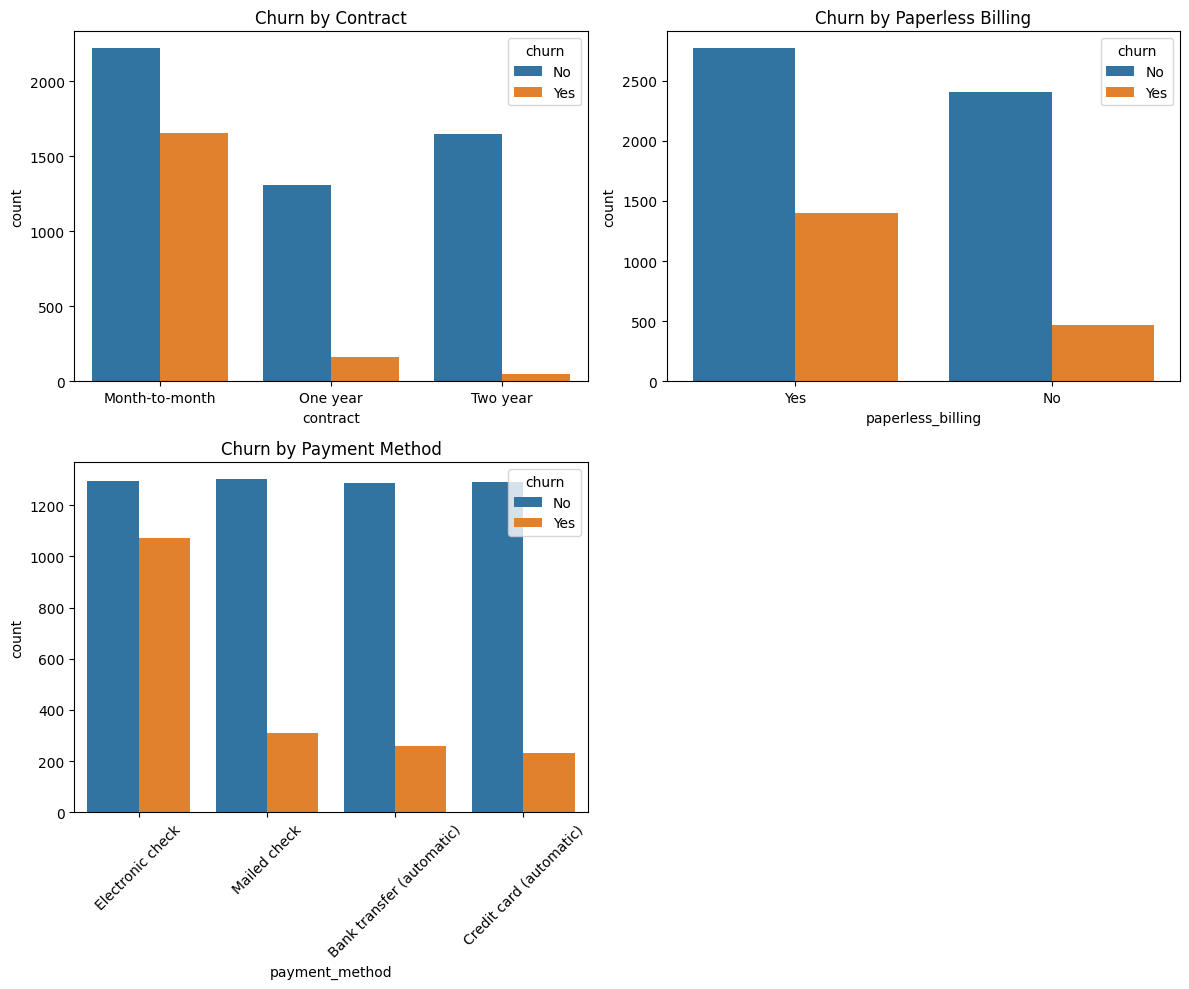

In [14]:
variables = ['contract', 'paperless_billing', 'payment_method']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plotting each Customer Agreement features with churn
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=var, hue='churn', ax=axes[row, col])
    axes[row, col].set_title(f'Churn by {var.replace("_", " ").title()}')
    if var == 'payment_method':
        axes[row, col].tick_params(axis='x', rotation=45)

axes[1, 1].set_visible(False)

plt.tight_layout()
plt.show()

In [26]:
variables = ['contract', 'paperless_billing', 'payment_method']

# find statistical significance (Chi-Square Test) and practical significance (Cramer's V) 
# for each Customer Agreement features with churn
for var in variables:
    cont = pd.crosstab(df[var], df['churn'])
    chi2, p, _, _ = chi2_contingency(cont)
    
    # only count its practical significance if it is statistically significance
    if p <= 0.05:
        n = cont.sum().sum()
        r, k = cont.shape
        cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))
        print(f"There is a significant association between {var} and churn with an effect size (Cramer's V) of {cramer_v:.4f}")

There is a significant association between contract and churn with an effect size (Cramer's V) of 0.4101
There is a significant association between paperless_billing and churn with an effect size (Cramer's V) of 0.1915
There is a significant association between payment_method and churn with an effect size (Cramer's V) of 0.3034


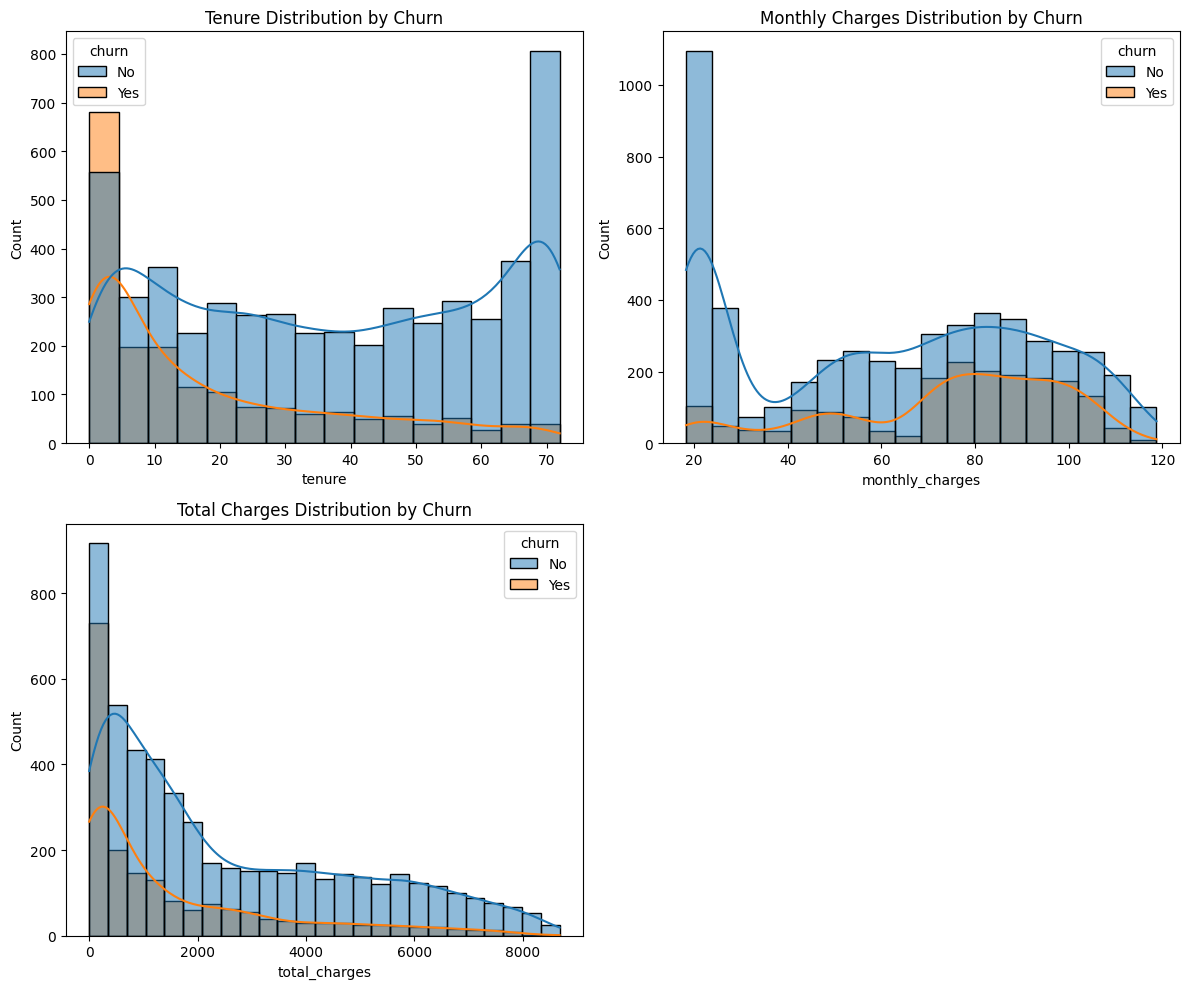

In [17]:
# Plotting every numeric features with churn
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data=df, x='tenure', hue='churn', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Tenure Distribution by Churn')

sns.histplot(data=df, x='monthly_charges', hue='churn', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Monthly Charges Distribution by Churn')

sns.histplot(data=df, x='total_charges', hue='churn', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Total Charges Distribution by Churn')

axes[1, 1].set_visible(False)

plt.tight_layout()
plt.show()

In [18]:
variables = ['tenure', 'monthly_charges', 'total_charges']

# find statistical significance (Mann Whitney U Test) and practical significance (Rank Biserrial Correlation) 
# for each numeric features with churn 
for var in variables:
    churn_yes = df[df['churn'] == 'Yes'][var]
    churn_no = df[df['churn'] == 'No'][var]
    
    u_stat, p_value = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')
    
    # only count its practical significance if it is statistically significance
    if p_value <= 0.05:
        n1 = len(churn_yes)
        n2 = len(churn_no)
        r = 1 - (2 * u_stat) / (n1 * n2)
        print(f"There is a significant association between {var} and churn with an effect size of {r:.4f}")

There is a significant association between tenure and churn with an effect size of 0.4797
There is a significant association between monthly_charges and churn with an effect size of -0.2416
There is a significant association between total_charges and churn with an effect size of 0.3007


In [25]:
# All effects from Bivariate Analysis above
all_effects = {
    'tenure': 0.4797,
    'contract': 0.4101,
    'online_security': 0.3474,
    'tech_support': 0.3429,
    'internet_service': 0.3225,
    'payment_method': 0.3034,
    'total_charges': 0.3007,
    'online_backup': 0.2923,
    'device_protection': 0.2816,
    'streaming_tv': 0.2305,
    'streaming_movies': 0.2310,
    'paperless_billing': 0.1915,
    'dependents': 0.1639,
    'senior_citizen': 0.1505,
    'partner': 0.1501,
    'monthly_charges': 0.2416,
    'multiple_lines': 0.0401
}

# Categorize features
heavy_hitters = {k: v for k, v in all_effects.items() if v > 0.4}
strategic_levers = {k: v for k, v in all_effects.items() 
                   if 0.25 <= v <= 0.35}

print("\n1. HEAVY HITTERS (Effect Size > 0.40)")
print("-" * 80)
for var, effect in sorted(heavy_hitters.items(), key=lambda x: x[1], reverse=True):
    print(f"{var:5} with Effect Size: {effect:.4f}")

print("\n2. STRATEGIC LEVERS (Effect Size 0.25 - 0.35)")
print("-" * 80)
for var, effect in sorted(strategic_levers.items(), key=lambda x: x[1], reverse=True):
    print(f"{var:5} with Effect Size: {effect:.4f}")




1. HEAVY HITTERS (Effect Size > 0.40)
--------------------------------------------------------------------------------
tenure with Effect Size: 0.4797
contract with Effect Size: 0.4101

2. STRATEGIC LEVERS (Effect Size 0.25 - 0.35)
--------------------------------------------------------------------------------
online_security with Effect Size: 0.3474
tech_support with Effect Size: 0.3429
internet_service with Effect Size: 0.3225
payment_method with Effect Size: 0.3034
total_charges with Effect Size: 0.3007
online_backup with Effect Size: 0.2923
device_protection with Effect Size: 0.2816


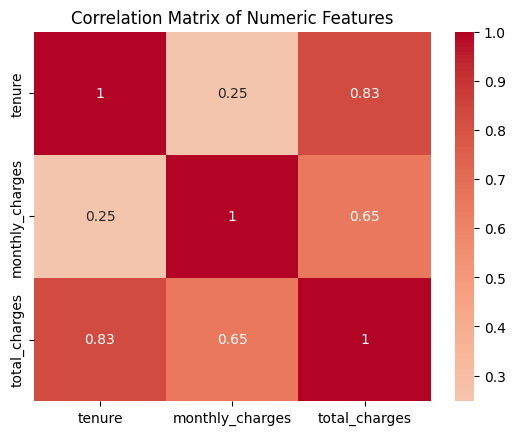

In [20]:
# Analyze correlations between numeric features to identify multicollinearity
numeric_cols = ['tenure', 'monthly_charges', 'total_charges']
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

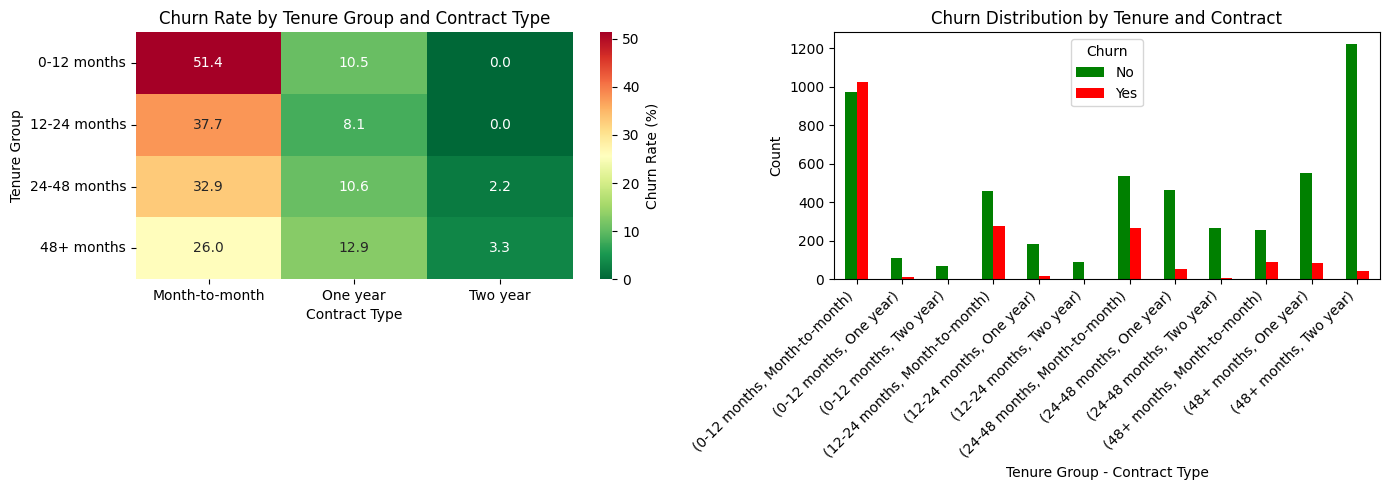

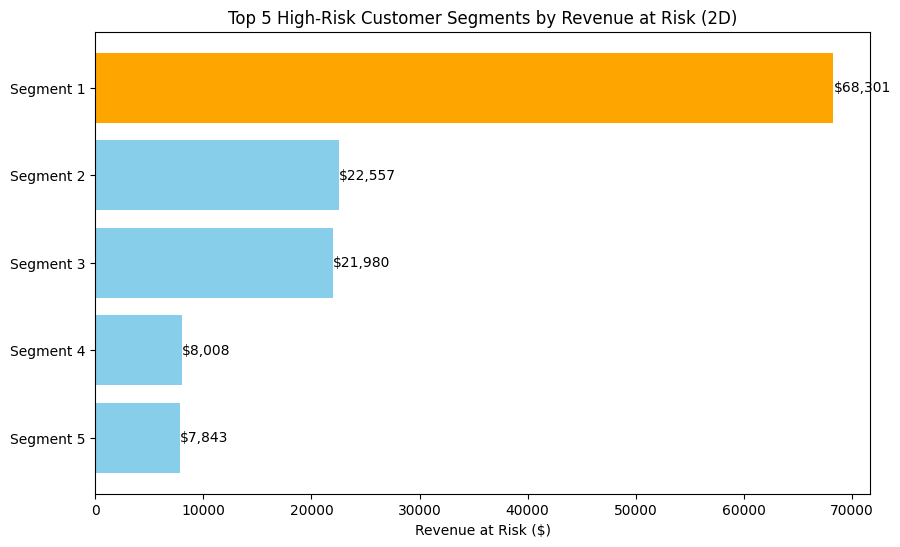


Detailed Table of Top 5 High-Risk Customer Segments by Revenue at Risk (2D):

Segment    Tenure          Contract        Total Cust   Churned    Revenue Risk    Churn Rate  
--------------------------------------------------------------------------------------------------------------
1          0-12 months     Month-to-month  1,994        1,024      $68,301         51.4        %
2          24-48 months    Month-to-month  802          264        $22,557         32.9        %
3          12-24 months    Month-to-month  737          278        $21,980         37.7        %
4          48+ months      Month-to-month  342          89         $8,008          26.0        %
5          48+ months      One year        634          82         $7,843          12.9        %


In [ ]:
# Create tenure groups to segment customers by tenure length for targeted churn analysis
df['tenure_group'] = pd.cut(df['tenure'], 
                             bins=[-1, 12, 24, 48, 72],
                             labels=['0-12 months', '12-24 months', '24-48 months', '48+ months'])

# Calculating total customers in each tenure_group contract group to find the high-risk segments
churn_by_segment = df.groupby(['tenure_group', 'contract']).agg({
    'churn': lambda x: (x == 'Yes').sum(),
    'customer_id': 'count'
}).rename(columns={'churn': 'churned_count', 'customer_id': 'total_customers'})

churn_by_segment['churn_rate'] = (churn_by_segment['churned_count'] / 
                                   churn_by_segment['total_customers'] * 100)



fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Visualize churn rates by tenure group and contract type to identify high-risk segments
pivot_churn_rate = df.groupby(['tenure_group', 'contract'], observed=True)['churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).unstack()

sns.heatmap(pivot_churn_rate, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            ax=axes[0], cbar_kws={'label': 'Churn Rate (%)'})
axes[0].set_title('Churn Rate by Tenure Group and Contract Type')
axes[0].set_ylabel('Tenure Group')
axes[0].set_xlabel('Contract Type')

tenure_contract_churn = df.groupby(['tenure_group', 'contract', 'churn'], observed=True).size().unstack(fill_value=0)
tenure_contract_churn.plot(kind='bar', ax=axes[1], color=['green', 'red'])
axes[1].set_title('Churn Distribution by Tenure and Contract')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Tenure Group - Contract Type')
axes[1].legend(title='Churn', labels=['No', 'Yes'])
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Calculate revenue at risk (monthly charges of churned customers per segment) and sorting by it
df_churned = df[df['churn'] == 'Yes']
churn_by_segment['revenue_at_risk'] = df_churned.groupby(['tenure_group', 'contract'])['monthly_charges'].sum().round(0)
churn_sorted = churn_by_segment.sort_values('revenue_at_risk', ascending=False)

# Visualize top 5 high-risk segments by revenue at risk
top_5_2d = churn_sorted.head(5)
labels_2d = [f"Segment {i+1}" for i in range(5)]

plt.figure(figsize=(10, 6))
colors_2d = ['orange'] + ['skyblue'] * 4
bars_2d = plt.barh(labels_2d, top_5_2d['revenue_at_risk'], color=colors_2d)
plt.xlabel('Revenue at Risk ($)')
plt.title('Top 5 High-Risk Customer Segments by Revenue at Risk (2D)')
plt.gca().invert_yaxis()

# Add value labels at the end of each bar
for bar, value in zip(bars_2d, top_5_2d['revenue_at_risk']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'${value:,.0f}', 
             va='center', ha='left', fontsize=10)

plt.show()

# Create a table for the top 5 segments
print("\nDetailed Table of Top 5 High-Risk Customer Segments by Revenue at Risk (2D):\n")
print(f"{'Segment':<10} {'Tenure':<15} {'Contract':<15} {'Total Cust':<12} {'Churned':<10} {'Revenue Risk':<15} {'Churn Rate':<12}")
print("-" * 110)

for idx, (segment, row) in enumerate(top_5_2d.iterrows(), 1):
    tenure, contract = segment
    total_cust = int(row['total_customers'])
    churned_cust = int(row['churned_count'])
    revenue_risk = int(row['revenue_at_risk'])
    churn_rate = row['churn_rate']
    
    print(f"{idx:<10} {tenure:<15} {contract:<15} {total_cust:<12,} {churned_cust:<10,} ${revenue_risk:<14,} {churn_rate:<12.1f}%")

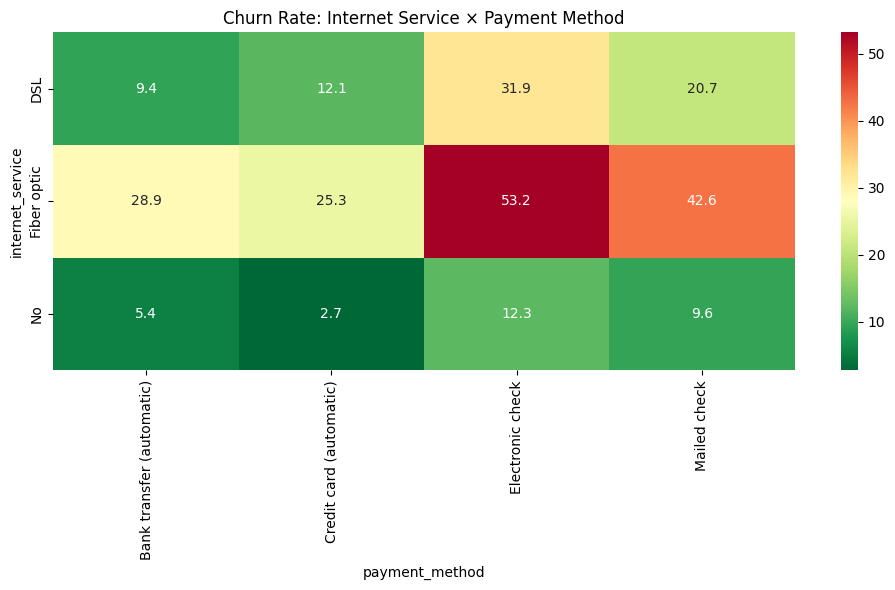

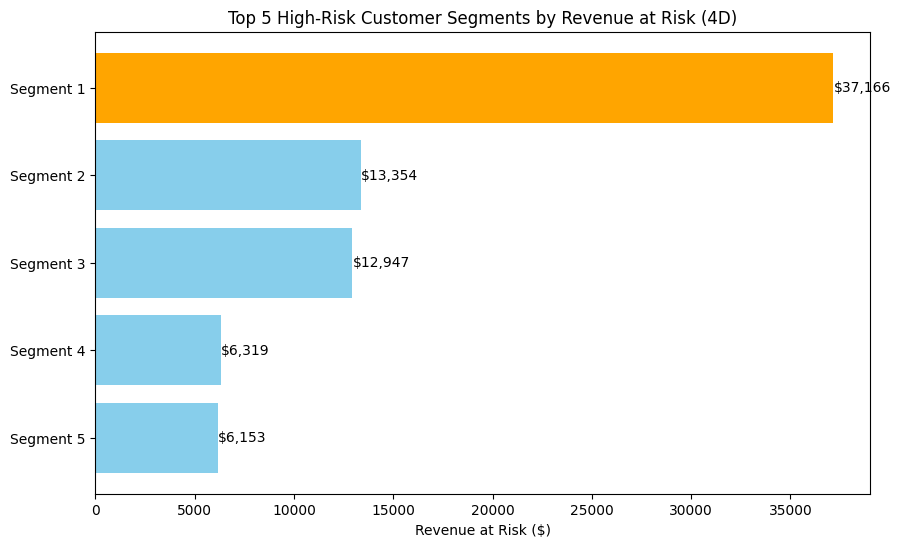


Detailed Table of Top 5 High-Risk Customer Segments by Revenue at Risk (4D):

Segment    Tenure          Contract        Internet     Payment            Total Cust   Churned    Revenue Risk    Churn Rate  
--------------------------------------------------------------------------------------------------------------------------------------------
1          0-12 months     Month-to-month  Fiber optic  Electronic check   631          449        $37,166         71.2        %
2          12-24 months    Month-to-month  Fiber optic  Electronic check   255          150        $13,354         58.8        %
3          24-48 months    Month-to-month  Fiber optic  Electronic check   286          140        $12,947         49.0        %
4          0-12 months     Month-to-month  DSL          Electronic check   282          142        $6,319          50.4        %
5          0-12 months     Month-to-month  Fiber optic  Mailed check       123          77         $6,153          62.6        %


In [ ]:
key_variables = ['tenure_group', 'contract', 'internet_service', 'payment_method']

plt.figure(figsize=(10, 6))

internet_payment = df.groupby(['internet_service', 'payment_method'])['churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).unstack()

# Generates a heatmap of churn rates by internet service and payment method
sns.heatmap(internet_payment, annot=True, fmt='.1f', cmap='RdYlGn_r')
plt.title('Churn Rate: Internet Service × Payment Method')

# then segments customers by multiple variables to rank high-risk groups by revenue at risk.
segment_churn = df.groupby(key_variables).agg({
    'churn': [
        ('total', 'count'),
        ('churned', lambda x: (x == 'Yes').sum()),
    ]
}).round(0)
segment_churn.columns = ['total_customers', 'churned_customers']
segment_churn['churn_rate_%'] = (segment_churn['churned_customers'] / 
                                  segment_churn['total_customers'] * 100).round(1)

plt.tight_layout()
plt.show()

segment_churn['revenue_at_risk'] = df_churned.groupby(key_variables)['monthly_charges'].sum().round(0)
segment_churn_sorted = segment_churn.sort_values('revenue_at_risk', ascending=False)

# Visualize top 5 high-risk segments by revenue at risk
top_5_4d = segment_churn_sorted.head(5)
labels_4d = [f"Segment {i+1}" for i in range(5)]

plt.figure(figsize=(10, 6))
colors_4d = ['orange'] + ['skyblue'] * 4
bars_4d = plt.barh(labels_4d, top_5_4d['revenue_at_risk'], color=colors_4d)
plt.xlabel('Revenue at Risk ($)')
plt.title('Top 5 High-Risk Customer Segments by Revenue at Risk (4D)')
plt.gca().invert_yaxis()

# Add value labels at the end of each bar
for bar, value in zip(bars_4d, top_5_4d['revenue_at_risk']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'${value:,.0f}', 
             va='center', ha='left', fontsize=10)

plt.show()

# Create a table for the top 5 segments
print("\nDetailed Table of Top 5 High-Risk Customer Segments by Revenue at Risk (4D):\n")
print(f"{'Segment':<10} {'Tenure':<15} {'Contract':<15} {'Internet':<12} {'Payment':<18} {'Total Cust':<12} {'Churned':<10} {'Revenue Risk':<15} {'Churn Rate':<12}")
print("-" * 140)

for idx, (segment, row) in enumerate(top_5_4d.iterrows(), 1):
    tenure, contract, internet, payment = segment
    total_cust = int(row['total_customers'])
    churned_cust = int(row['churned_customers'])
    revenue_risk = int(row['revenue_at_risk'])
    churn_rate = row['churn_rate_%']
    
    print(f"{idx:<10} {tenure:<15} {contract:<15} {internet:<12} {payment:<18} {total_cust:<12,} {churned_cust:<10,} ${revenue_risk:<14,} {churn_rate:<12.1f}%")

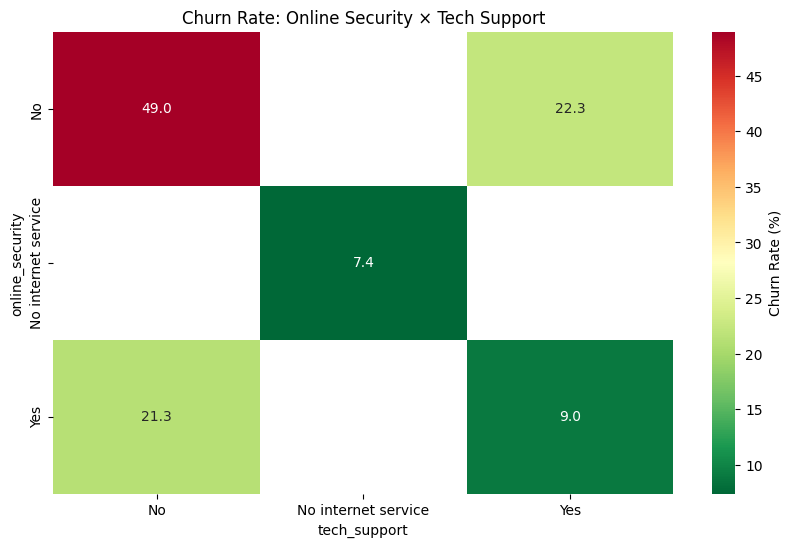

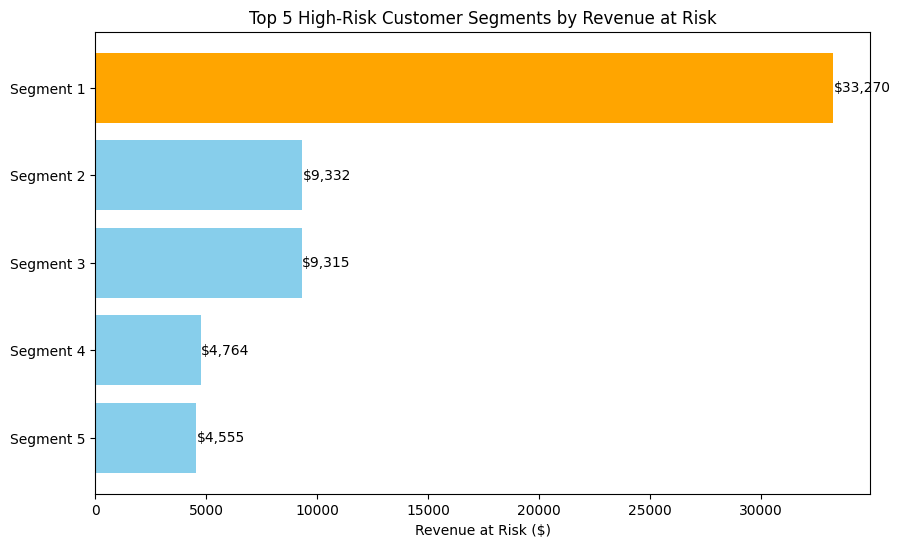


Detailed Table of Top 5 High-Risk Customer Segments by Revenue at Risk (6D):

Segment    Tenure          Contract        Internet     Payment            Security   Support    Total Cust   Churned    Revenue Risk    Churn Rate  
----------------------------------------------------------------------------------------------------------------------------------------------------------------
1          0-12 months     Month-to-month  Fiber optic  Electronic check   No         No         544          405        $33,270         74.4        %
2          24-48 months    Month-to-month  Fiber optic  Electronic check   No         No         192          102        $9,332          53.1        %
3          12-24 months    Month-to-month  Fiber optic  Electronic check   No         No         179          107        $9,315          59.8        %
4          0-12 months     Month-to-month  Fiber optic  Bank transfer (automatic) No         No         69           58         $4,764          84.1        %

In [ ]:
# Extends customer segmentation to include online security and tech support
key_variables_6d = ['tenure_group', 'contract', 'internet_service', 'payment_method', 'online_security', 'tech_support']
segment_churn_6d = df.groupby(key_variables_6d).agg({
    'churn': [
        ('total', 'count'),
        ('churned', lambda x: (x == 'Yes').sum()),
    ]
}).round(0)
segment_churn_6d.columns = ['total_customers', 'churned_customers']

# Calculating churn rate for each customer segments, then finding their average monthly charges
# and rank them based on that
segment_churn_6d['churn_rate_%'] = (segment_churn_6d['churned_customers'] / 
                                      segment_churn_6d['total_customers'] * 100).round(1)
segment_churn_6d['revenue_at_risk'] = df_churned.groupby(key_variables_6d)['monthly_charges'].sum().round(0)
segment_churn_6d = segment_churn_6d.sort_values('revenue_at_risk', ascending=False)

plt.figure(figsize=(10, 6))

security_support = df.groupby(['online_security', 'tech_support'], observed=True)['churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).unstack()

# Generates a heatmap of churn rates by Online Security and Tech Support
sns.heatmap(security_support, annot=True, fmt='.1f', cmap='RdYlGn_r', cbar_kws={'label': 'Churn Rate (%)'})
plt.title('Churn Rate: Online Security × Tech Support')
plt.show()

# Visualize top 5 high-risk segments by revenue at risk
top_5_6d = segment_churn_6d.head(5)
labels_6d = [f"Segment {i+1}" for i in range(5)]

plt.figure(figsize=(10, 6))
colors_6d = ['orange'] + ['skyblue'] * 4
bars_6d = plt.barh(labels_6d, top_5_6d['revenue_at_risk'], color=colors_6d)
plt.xlabel('Revenue at Risk ($)')
plt.title('Top 5 High-Risk Customer Segments by Revenue at Risk')
plt.gca().invert_yaxis()

# Add value labels at the end of each bar
for bar, value in zip(bars_6d, top_5_6d['revenue_at_risk']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'${value:,.0f}', 
             va='center', ha='left', fontsize=10)

plt.show()

# Create a table for the top 5 segments
print("\nDetailed Table of Top 5 High-Risk Customer Segments by Revenue at Risk (6D):\n")
print(f"{'Segment':<10} {'Tenure':<15} {'Contract':<15} {'Internet':<12} {'Payment':<18} {'Security':<10} {'Support':<10} {'Total Cust':<12} {'Churned':<10} {'Revenue Risk':<15} {'Churn Rate':<12}")
print("-" * 160)

for idx, (segment, row) in enumerate(top_5_6d.iterrows(), 1):
    tenure, contract, internet, payment, security, support = segment
    total_cust = int(row['total_customers'])
    churned_cust = int(row['churned_customers'])
    revenue_risk = int(row['revenue_at_risk'])
    churn_rate = row['churn_rate_%']
    
    print(f"{idx:<10} {tenure:<15} {contract:<15} {internet:<12} {payment:<18} {security:<10} {support:<10} {total_cust:<12,} {churned_cust:<10,} ${revenue_risk:<14,} {churn_rate:<12.1f}%")

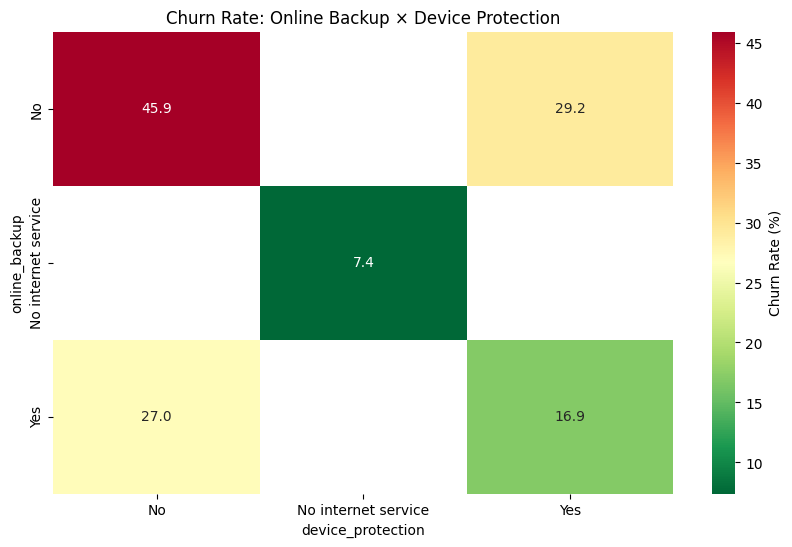

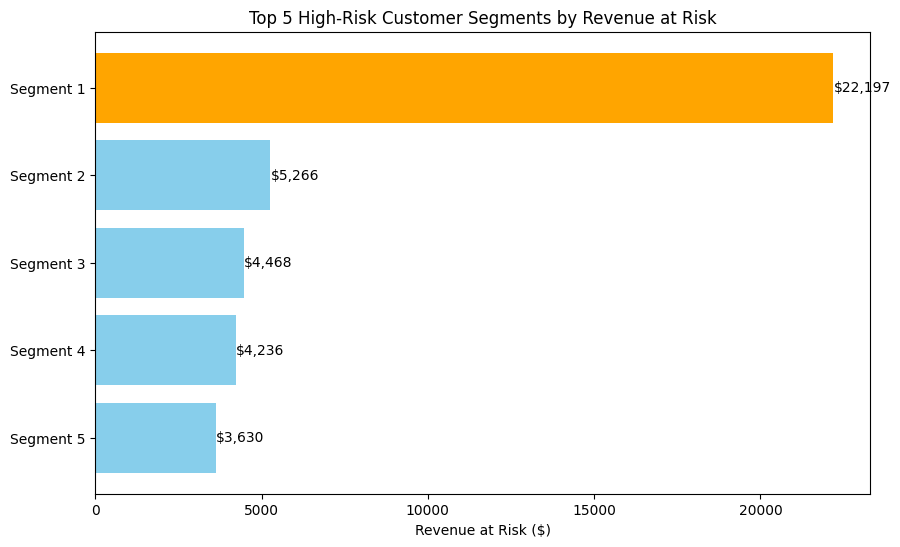


Detailed Table of Top 5 High-Risk Customer Segments by Revenue at Risk:

Segment    Tenure          Contract        Internet     Payment            Security   Support    Backup     Device     Total Cust   Churned    Revenue Risk    Churn Rate  
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1          0-12 months     Month-to-month  Fiber optic  Electronic check   No         No         No         No         377          281        $22,197         74.5        %
2          0-12 months     Month-to-month  Fiber optic  Electronic check   No         No         No         Yes        76           58         $5,266          76.3        %
3          0-12 months     Month-to-month  Fiber optic  Electronic check   No         No         Yes        No         71           52         $4,468          73.2        %
4          12-24 months    Month-to-month  Fiber optic

In [48]:
key_variables_8d = ['tenure_group', 'contract', 'internet_service', 'payment_method', 
                    'online_security', 'tech_support', 'online_backup', 'device_protection']

# Grouping customers with 8 key variables above to find the most spesific and highest-risk segments
segment_churn_8d = df.groupby(key_variables_8d).agg({
    'churn': [
        ('total', 'count'),
        ('churned', lambda x: (x == 'Yes').sum()),
    ]
}).round(0)
segment_churn_8d.columns = ['total_customers', 'churned_customers']

# Calculating churn rate for each customer segments, then finding their average monthly charges
# and rank them based on that
segment_churn_8d['churn_rate_%'] = (segment_churn_8d['churned_customers'] / 
                                      segment_churn_8d['total_customers'] * 100).round(1)
segment_churn_8d['revenue_at_risk'] = df_churned.groupby(key_variables_8d)['monthly_charges'].sum().round(0)
segment_churn_8d = segment_churn_8d.sort_values('revenue_at_risk', ascending=False)


plt.figure(figsize=(10, 6))

backup_device = df.groupby(['online_backup', 'device_protection'], observed=True)['churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).unstack()

# Generates a heatmap of churn rates by Online Backup and Device Protection
sns.heatmap(backup_device, annot=True, fmt='.1f', cmap='RdYlGn_r', cbar_kws={'label': 'Churn Rate (%)'})
plt.title('Churn Rate: Online Backup × Device Protection')
plt.show()

top_5 = segment_churn_8d.head(5)
labels = [f"Segment {i+1}" for i in range(5)]

plt.figure(figsize=(10, 6))
colors = ['orange'] + ['skyblue'] * 4
bars = plt.barh(labels, top_5['revenue_at_risk'], color=colors)
plt.xlabel('Revenue at Risk ($)')
plt.title('Top 5 High-Risk Customer Segments by Revenue at Risk')
plt.gca().invert_yaxis()  # Optional: to show highest at top

# Add value labels at the end of each bar
for bar, value in zip(bars, top_5['revenue_at_risk']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'${value:,.0f}', 
             va='center', ha='left', fontsize=10)

plt.show()

# Create a table for the top 5 segments
print("\nDetailed Table of Top 5 High-Risk Customer Segments by Revenue at Risk:\n")
print(f"{'Segment':<10} {'Tenure':<15} {'Contract':<15} {'Internet':<12} {'Payment':<18} {'Security':<10} {'Support':<10} {'Backup':<10} {'Device':<10} {'Total Cust':<12} {'Churned':<10} {'Revenue Risk':<15} {'Churn Rate':<12}")
print("-" * 180)

for idx, (segment, row) in enumerate(top_5.iterrows(), 1):
    tenure, contract, internet, payment, security, support, backup, device = segment
    total_cust = int(row['total_customers'])
    churned_cust = int(row['churned_customers'])
    revenue_risk = int(row['revenue_at_risk'])
    churn_rate = row['churn_rate_%']
    
    print(f"{idx:<10} {tenure:<15} {contract:<15} {internet:<12} {payment:<18} {security:<10} {support:<10} {backup:<10} {device:<10} {total_cust:<12,} {churned_cust:<10,} ${revenue_risk:<14,} {churn_rate:<12.1f}%")